Task 2: Customer Segmentation

Objective: Cluster customers based on spending habits and visualize segments.

Dataset: Mall Customers dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Missing values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


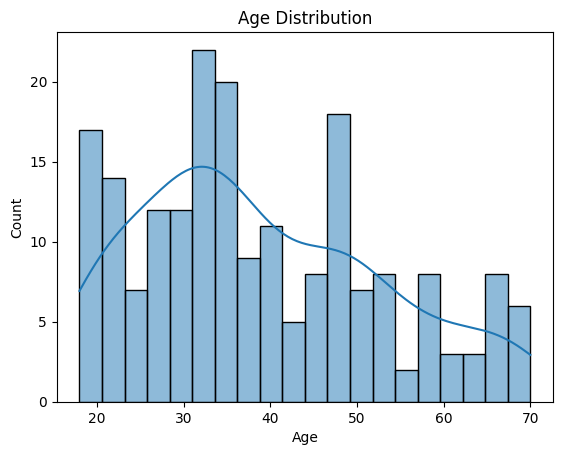

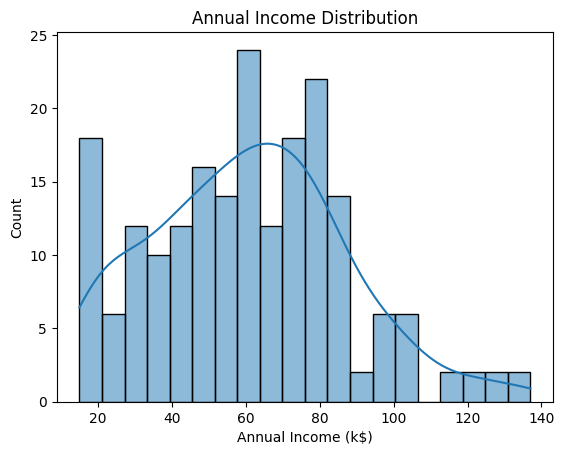

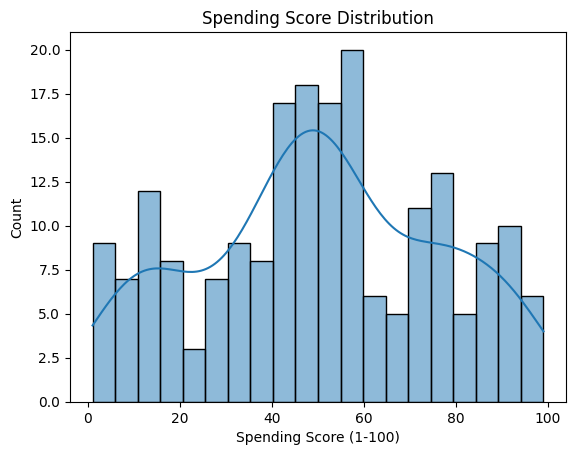

In [3]:
df.info()
print("Missing values:\n", df.isnull().sum())
df.describe()

sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(df["Annual Income (k$)"], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.show()

sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.show()

In [4]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

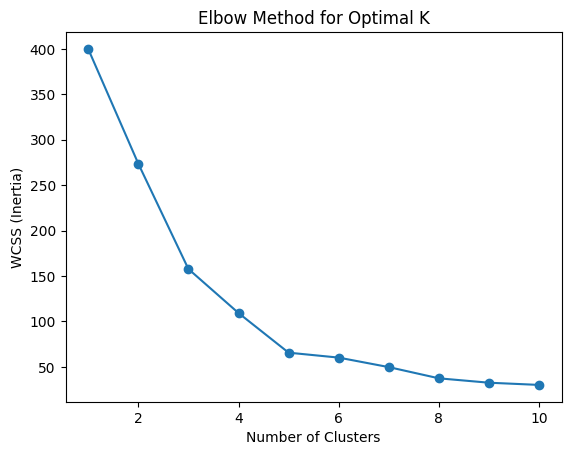

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [6]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


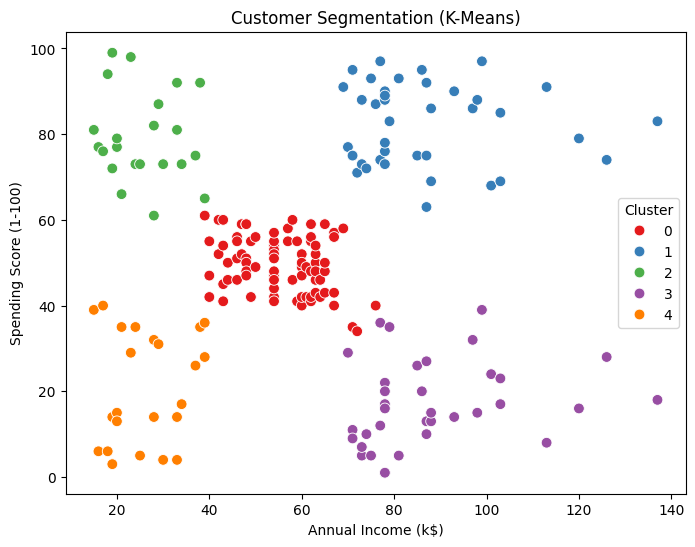

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set1",
    data=df,
    s=60
)
plt.title("Customer Segmentation (K-Means)")
plt.show()

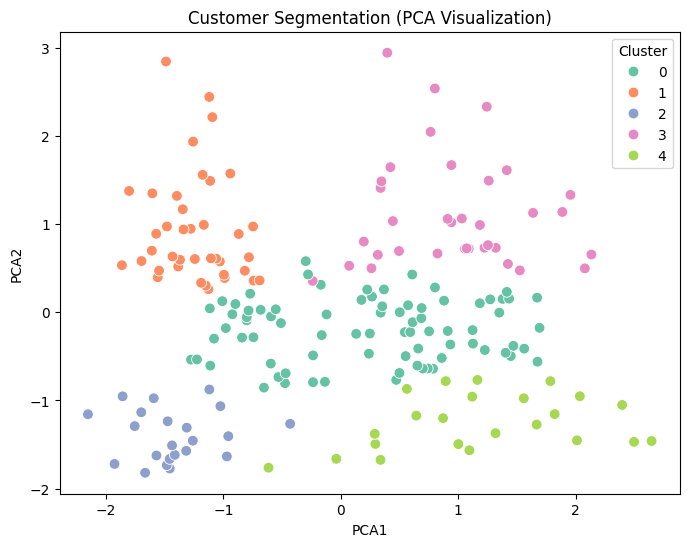

In [8]:
X_all = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
X_all_scaled = scaler.fit_transform(X_all)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all_scaled)

df["PCA1"] = X_pca[:,0]
df["PCA2"] = X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="Cluster",
    palette="Set2",
    data=df,
    s=60
)
plt.title("Customer Segmentation (PCA Visualization)")
plt.show()

In [9]:
cluster_summary = df.groupby("Cluster")[["Age","Annual Income (k$)","Spending Score (1-100)"]].mean()
print(cluster_summary)

for cluster in cluster_summary.index:
    income = cluster_summary.loc[cluster, "Annual Income (k$)"]
    score = cluster_summary.loc[cluster, "Spending Score (1-100)"]
    print(f"\nCluster {cluster}: Avg Income={income:.1f}, Avg Score={score:.1f}")
    if score > 60 and income > 60:
        print("👉 Potential Premium Customers (Target with exclusive offers).")
    elif score < 40 and income > 60:
        print("👉 Wealthy but not spending much (Upsell campaigns).")
    elif score > 60 and income < 40:
        print("👉 High spenders with low income (Budget-friendly offers).")
    else:
        print("👉 Regular customers.")

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043

Cluster 0: Avg Income=55.3, Avg Score=49.5
👉 Regular customers.

Cluster 1: Avg Income=86.5, Avg Score=82.1
👉 Potential Premium Customers (Target with exclusive offers).

Cluster 2: Avg Income=25.7, Avg Score=79.4
👉 High spenders with low income (Budget-friendly offers).

Cluster 3: Avg Income=88.2, Avg Score=17.1
👉 Wealthy but not spending much (Upsell campaigns).

Cluster 4: Avg Income=26.3, Avg Score=20.9
👉 Regular customers.
